# Twitter Sentiment Analysis


In [228]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [229]:

df=pd.read_csv("C:\\Users\\Admin\\Documents\\GitHub\\PRODIGY_DS_04\\twitter_training.csv")
df

,Tweet_ID,Entity,Sentiment,Tweet_Content
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
...,...,...,...,...
74677,9200,Nvidia,Positive,Just realized that the Windows partition of my...
74678,9200,Nvidia,Positive,Just realized that my Mac window partition is ...
74679,9200,Nvidia,Positive,Just realized the windows partition of my Mac ...
74680,9200,Nvidia,Positive,Just realized between the windows partition of...


In [230]:
# Display basic information
print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74682 entries, 0 to 74681
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Tweet_ID       74682 non-null  int64 
 1   Entity         74682 non-null  object
 2   Sentiment      74682 non-null  object
 3   Tweet_Content  73996 non-null  object
dtypes: int64(1), object(3)
memory usage: 2.3+ MB
None


In [231]:
# Check for missing values
print(df.isnull().sum())

Tweet_ID           0
Entity             0
Sentiment          0
Tweet_Content    686
dtype: int64


In [232]:
# Group by Sentiment and calculate the mode for Tweet_Content
mode_tweet_per_sentiment = df.groupby('Sentiment')['Tweet_Content'].agg(lambda x: x.mode().iloc[0] if not x.mode().empty else None)

# Function to replace missing values with mode of similar sentiment
def replace_with_mode(row):
    if pd.isnull(row['Tweet_Content']):
        return mode_tweet_per_sentiment[row['Sentiment']]
    return row['Tweet_Content']

# Apply the function row-wise to replace null values
df['Tweet_Content'] = df.apply(replace_with_mode, axis=1)


In [233]:
# Check for missing values
print(df.isnull().sum())

Tweet_ID         0
Entity           0
Sentiment        0
Tweet_Content    0
dtype: int64


C:\Users\Admin\AppData\Local\Temp\ipykernel_21376\2833884096.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Sentiment', palette='coolwarm')


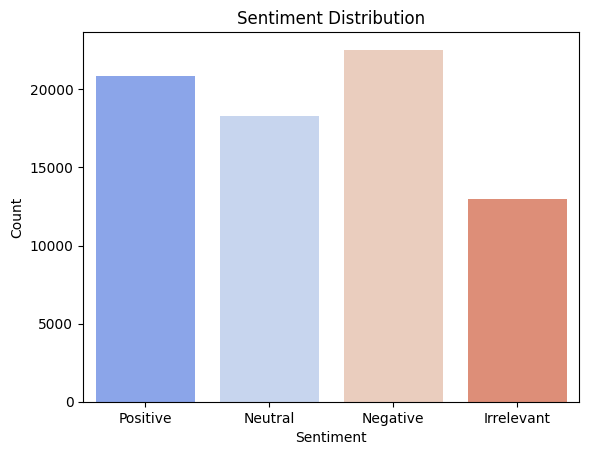

In [234]:
# Countplot for sentiment distribution
sns.countplot(data=df, x='Sentiment', palette='coolwarm')
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()


In [235]:
# Group by entity and sentiment
entity_sentiment = df.groupby(['Entity', 'Sentiment']).size().unstack(fill_value=0)
entity_sentiment


Sentiment,Irrelevant,Negative,Neutral,Positive
Entity,,,,
Amazon,192,576,1236,312
ApexLegends,192,600,942,642
AssassinsCreed,264,378,156,1446
Battlefield,918,474,360,594
Borderlands,240,426,600,1020
CS-GO,636,348,552,768
CallOfDuty,672,894,378,450
CallOfDutyBlackopsColdWar,576,576,360,864
Cyberpunk2077,480,390,468,966


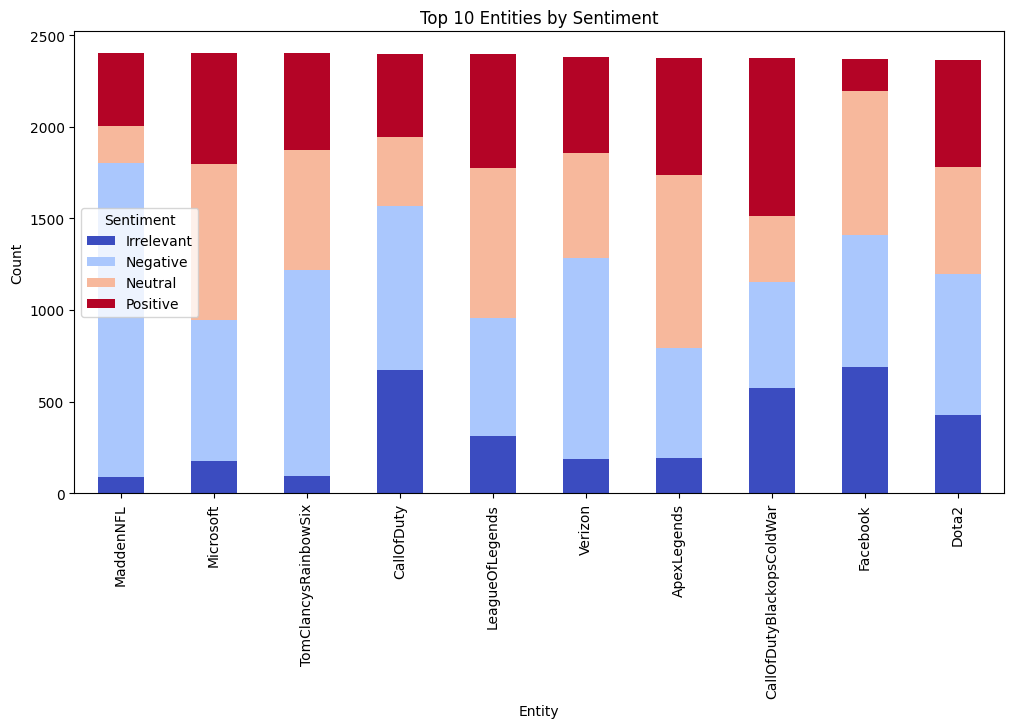

In [236]:
# Plot top 10 entities
top_entities = entity_sentiment.loc[entity_sentiment.sum(axis=1).nlargest(10).index]
top_entities.plot(kind='bar', stacked=True, figsize=(12, 6), colormap='coolwarm')
plt.title('Top 10 Entities by Sentiment')
plt.xlabel('Entity')
plt.ylabel('Count')
plt.show()

The code creates a stacked bar chart to visualize sentiment distribution across the top 10 most discussed entities. It groups the data by Entity and Sentiment, counts occurrences for each combination, and reshapes the data into a matrix. The top 10 entities with the highest tweet counts are selected, and a stacked bar plot is generated, where different sentiment categories are stacked within each bar. This approach highlights the overall engagement and sentiment breakdown for these entities.


This chart compares sentiment across 10 gaming and tech companies/products. Most have around 2000-2500 total mentions, with negative sentiment dominating across the board. Facebook and Call of Duty stand out for having more irrelevant mentions, while gaming titles like Madden NFL and Rainbow Six show stronger positive sentiment. Overall, there's a clear trend of negative sentiment outweighing positive across all entities, with neutral comments making up a significant middle ground.







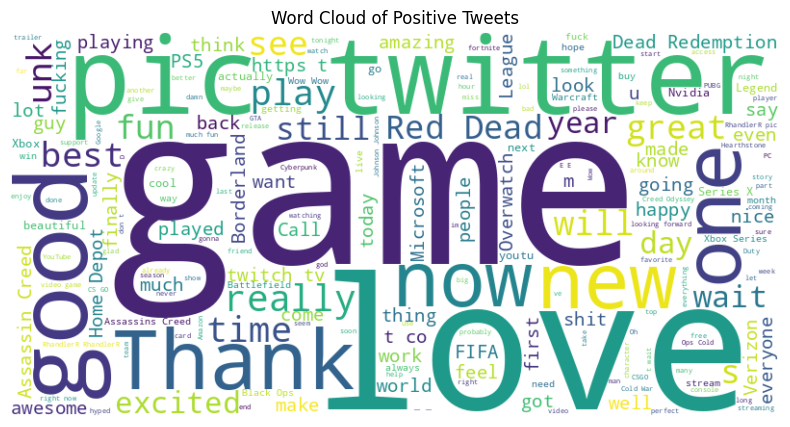

In [237]:
# Generate a Word Cloud
# Concatenate all positive tweets
positive_tweets = " ".join(df[df['Sentiment'] == 'Positive']['Tweet_Content'])

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(positive_tweets)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Positive Tweets')
plt.show()

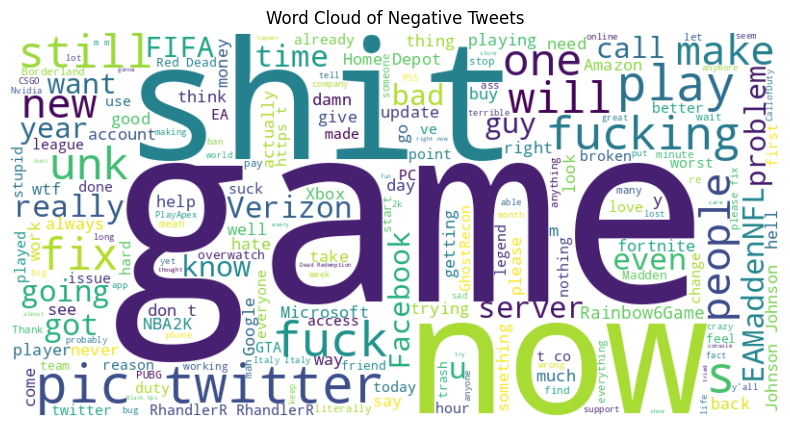

In [238]:
# Concatenate all negative tweets
negative_tweets = " ".join(df[df['Sentiment'] == 'Negative']['Tweet_Content'])

# Generate the word cloud
wordcloud_negative = WordCloud(width=800, height=400, background_color='white').generate(negative_tweets)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_negative, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Negative Tweets')
plt.show()


In [239]:
print(df['Sentiment'].unique())

['Positive' 'Neutral' 'Negative' 'Irrelevant']


In [240]:
df['Sentiment'] = df['Sentiment'].str.strip().str.capitalize()



In [241]:
df['Sentiment'] = df['Sentiment'].map({'Positive': 1, 'Negative': 0, 'Neutral': 2, 'Irrelevant': 3})
y=df['Sentiment']
y


0        1
1        1
2        1
3        1
4        1
        ..
74677    1
74678    1
74679    1
74680    1
74681    1
Name: Sentiment, Length: 74682, dtype: int64

In [242]:
print(df['Sentiment'].unique())

[1 2 0 3]


In [243]:
print(df['Sentiment'].isnull().sum())

0


In [244]:
print(df[df['Sentiment'].isnull()])

Empty DataFrame
Columns: [Tweet_ID, Entity, Sentiment, Tweet_Content]
Index: []


In [250]:

# Replace missing content with a placeholder if needed (optional)
df['Sentiment'] = df['Sentiment'].map({'Positive': 1, 'Negative': 0, 'Neutral': 2, 'Irrelevant': 3})
# Remove rows with missing Sentiment
#df = df.dropna(subset=['Sentiment'])

# Features and labels
#X = df['Tweet_Content']
y = df['Sentiment']
y


0       NaN
1       NaN
2       NaN
3       NaN
4       NaN
         ..
74677   NaN
74678   NaN
74679   NaN
74680   NaN
74681   NaN
Name: Sentiment, Length: 74682, dtype: float64

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report



0       NaN
1       NaN
2       NaN
3       NaN
4       NaN
         ..
74677   NaN
74678   NaN
74679   NaN
74680   NaN
74681   NaN
Name: Sentiment, Length: 74682, dtype: float64